# Visualizing Neural Networks with Pure Python / Tutorials

Example code for the lecture series "Machine Learning for Physicists" by Florian Marquardt

Lecture 1, Tutorials

See https://machine-learning-for-physicists.org and the current course website linked there!

This notebook shows how to:
- visualize neural networks

The networks have 2 input and 1 output neurons, but arbitrarily many hidden layers, and also you can choose the activation functions

### Imports: only numpy and matplotlib

In [1]:
import matplotlib
import numpy as np

# matplotlib.rcParams['figure.dpi']=300 # highres display

In [2]:
from visualize_network import visualize_network

### Functions

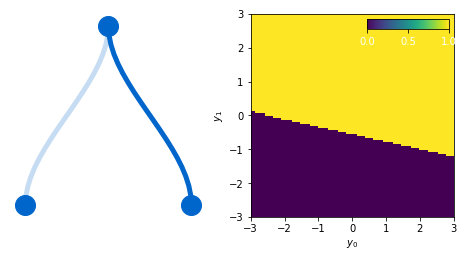

In [3]:
visualize_network(
    weights=[
        [[0.2, 0.9]]  # weights of 2 input neurons for single output neuron
    ],
    biases=[[0.5]],  # bias for single output neuron
    activations=['jump'],  # activation for output
    y0range=[-3, 3],
    y1range=[-3, 3],
)

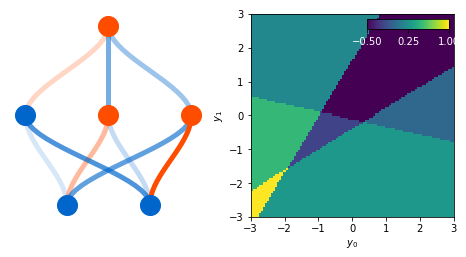

In [4]:
visualize_network(
    weights=[
        [
            [0.2, 0.9],  # weights of 2 input neurons for 1st hidden neuron
            [-0.5, 0.3],  # weights of 2 input neurons for 2nd hidden
            [0.8, -1.3],  # weights of 2 input neurons for 3rd hidden
        ],
        [[-0.3, 0.7, 0.5]],  # weights of 3 hidden neurons for output
    ],
    biases=[
        [0.1, -0.5, -0.5],  # biases of 3 hidden neurons
        [-0.2],  # bias for output neuron
    ],
    activations=[
        'jump',  # activation for hidden
        'linear',  # activation for output
    ],
    y0range=[-3, 3],
    y1range=[-3, 3],
)

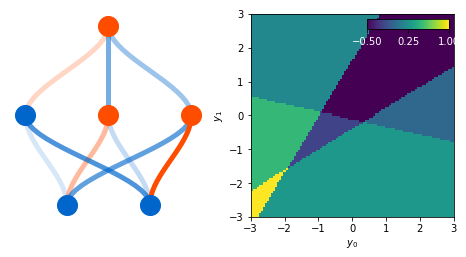

In [5]:
visualize_network(
    weights=[
        [
            [0.2, 0.9],  # weights of 2 input neurons for 1st hidden neuron
            [-0.5, 0.3],  # weights of 2 input neurons for 2nd hidden
            [0.8, -1.3],  # weights of 2 input neurons for 3rd hidden
        ],
        [[-0.3, 0.7, 0.5]],  # weights of 3 hidden neurons for output
    ],
    biases=[
        [0.1, -0.5, -0.5],  # biases of 3 hidden neurons
        [-0.2],  # bias for output neuron
    ],
    activations=[
        'jump',  # activation for hidden
        'linear',  # activation for output
    ],
    y0range=[-3, 3],
    y1range=[-3, 3],
)

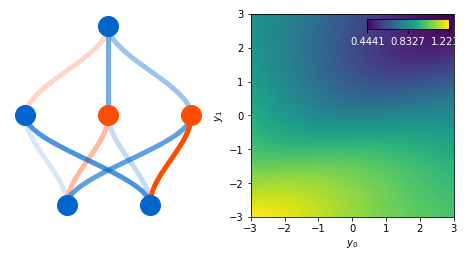

In [6]:
# the same, but with sigmoid (and more compactly written)
visualize_network(
    weights=[[[0.2, 0.9], [-0.5, 0.3], [0.8, -1.3]], [[-0.3, 0.7, 0.5]]],
    biases=[[0.1, -0.5, -0.5], [0.5]],
    activations=[
        'sigmoid',  # activation for hidden
        'linear',  # activation for output
    ],
    y0range=[-3, 3],
    y1range=[-3, 3],
)

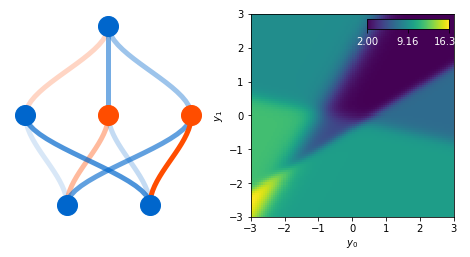

In [7]:
# sharper sigmoid: scale all weights and biases!
factor = 10.0
# this needs np.array(), because you cannot do factor*<python-list>

visualize_network(
    weights=[
        factor * np.array([[0.2, 0.9], [-0.5, 0.3], [0.8, -1.3]]),
        factor * np.array([[-0.3, 0.7, 0.5]]),
    ],
    biases=[factor * np.array([0.1, -0.5, -0.5]), factor * np.array([0.5])],
    activations=[
        'sigmoid',  # activation for hidden
        'linear',  # activation for output
    ],
    y0range=[-3, 3],
    y1range=[-3, 3],
)

## Further examples

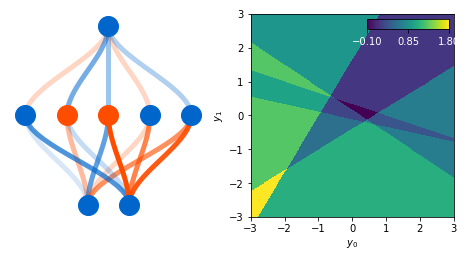

In [8]:
# now with 5 intermediate neurons, for fun:

visualize_network(
    weights=[
        [[0.2, 0.9], [-0.5, 0.3], [0.8, -1.3], [-0.3, -0.9], [-0.8, -1.2]],
        [[-0.3, 0.7, 0.5, -0.3, 0.4]],
    ],
    biases=[[0.1, -0.5, -0.5, 0.3, 0.2], [0.5]],
    activations=['jump', 'linear'],
    y0range=[-3, 3],
    y1range=[-3, 3],
    M=400,
)

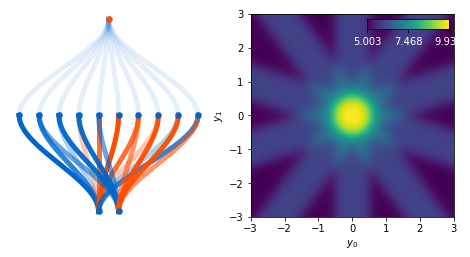

In [9]:
# many superimposed lines
# this can be used to construct arbitrary shapes
# with only a single hidden layer

n_lines = 10
phi = np.linspace(0, 2 * np.pi, n_lines + 1)[0:n_lines]

weight_array = np.zeros([n_lines, 2])
weight_array[:, 0] = factor * np.cos(phi)
weight_array[:, 1] = factor * np.sin(phi)
bias_array = np.full(n_lines, factor * (+0.5))

# sharper sigmoid: scale all weights and biases!
factor = 20.0
# this needs np.array(), because you cannot do factor*<python-list>
visualize_network(
    weights=[weight_array, np.full([1, n_lines], 1.0)],
    biases=[bias_array, [0.0]],
    activations=[
        'sigmoid',  # activation for hidden
        'linear',  # activation for output
    ],
    y0range=[-3, 3],
    y1range=[-3, 3],
    size=30.0,
    M=400,
)

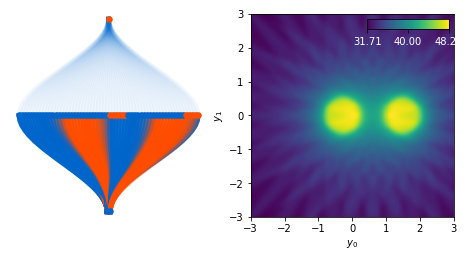

In [10]:
# two blobs, each constructed using many superimposed lines
# this can be used to construct arbitrary shapes
# with only a single hidden layer

n_lines = 30
phi = np.linspace(0, 2 * np.pi, n_lines + 1)[0:n_lines]

shifts = [-0.3, 1.5]
n_blobs = len(shifts)
full_weight_array = np.zeros([n_blobs * n_lines, 2])
full_bias_array = np.zeros(n_blobs * n_lines)

j = 0
for shift in shifts:
    weight_array = np.zeros([n_lines, 2])
    weight_array[:, 0] = factor * np.cos(phi)
    weight_array[:, 1] = factor * np.sin(phi)
    bias_array = np.full(n_lines, factor * (+0.5 - shift * np.cos(phi)))
    full_weight_array[j * n_lines : (j + 1) * n_lines, :] = weight_array[:, :]
    full_bias_array[j * n_lines : (j + 1) * n_lines] = bias_array[:]
    j += 1

# sharper sigmoid: scale all weights and biases!
factor = 20.0
# this needs np.array(), because you cannot do factor*<python-list>
visualize_network(
    weights=[full_weight_array, np.full([1, n_blobs * n_lines], 1.0)],
    biases=[full_bias_array, [0.0]],
    activations=[
        'sigmoid',  # activation for hidden
        'linear',  # activation for output
    ],
    y0range=[-3, 3],
    y1range=[-3, 3],
    size=30.0,
    M=400,
)

## Exercise: create a neural network with a square output

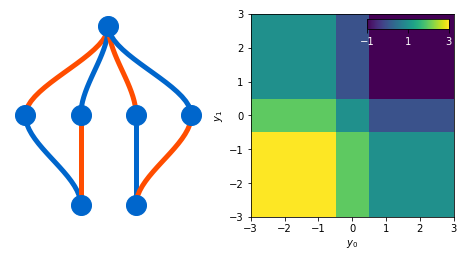

In [11]:
visualize_network(
    weights=[
        [[1, 0], [-1, 0], [0, 1], [0, -1]],
        [[-1, 1, -1, 1]],  # weights of hidden neurons for output
    ],
    biases=[
        [0.5, 0.5, 0.5, 0.5],  # biases of hidden neurons
        [1],  # bias for output neuron
    ],
    activations=[
        'jump',  # activation for hidden
        'linear',  # activation for output
    ],
    y0range=[-3, 3],
    y1range=[-3, 3],
)